In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [3]:
data=pd.read_csv("D:/Downloads/fifa.csv")

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.isnull().any()

Unnamed: 0                  False
ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                         True
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Preferred Foot               True
International Reputation     True
Weak Foot                    True
Skill Moves                  True
Work Rate                    True
Body Type                    True
Real Face                    True
Position                     True
Jersey Number                True
Joined                       True
Loaned From                  True
Contract Valid Until         True
Height                       True
Weight                       True
LS                           True
ST            

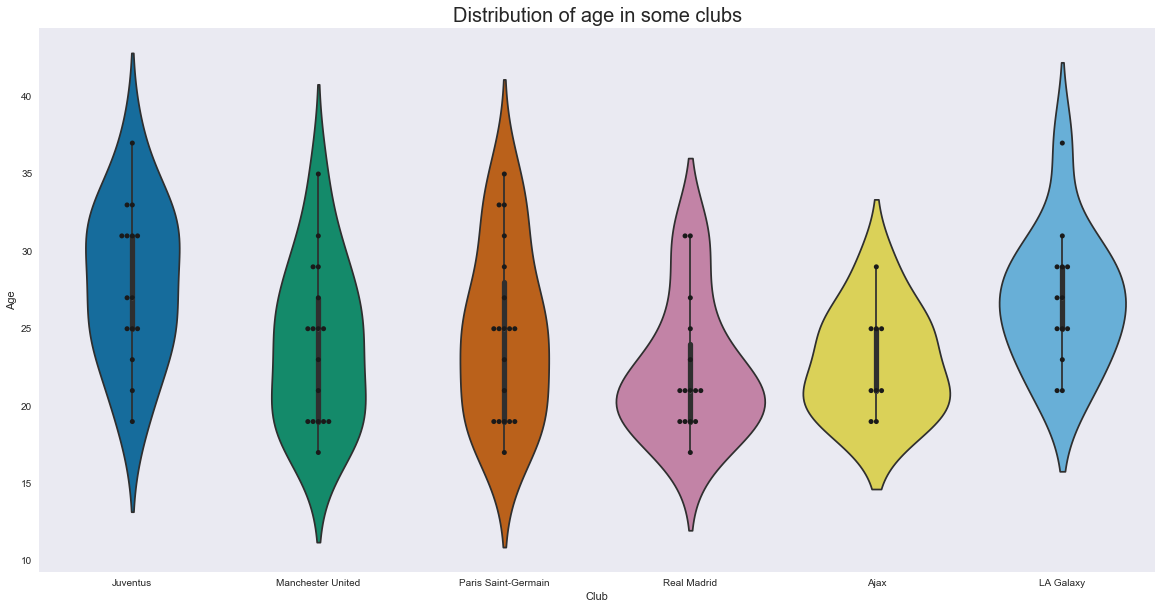

In [71]:
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'Ajax', 'LA Galaxy', 'Manchester United')
df_club = data.loc[data['Club'].isin(some_clubs) & data['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="Club", y="Age", data=df_club);
sns.swarmplot(x='Club', y='Age',color='k', data=df_club);
ax.set_title(label='Distribution of age in some clubs', fontsize=20);

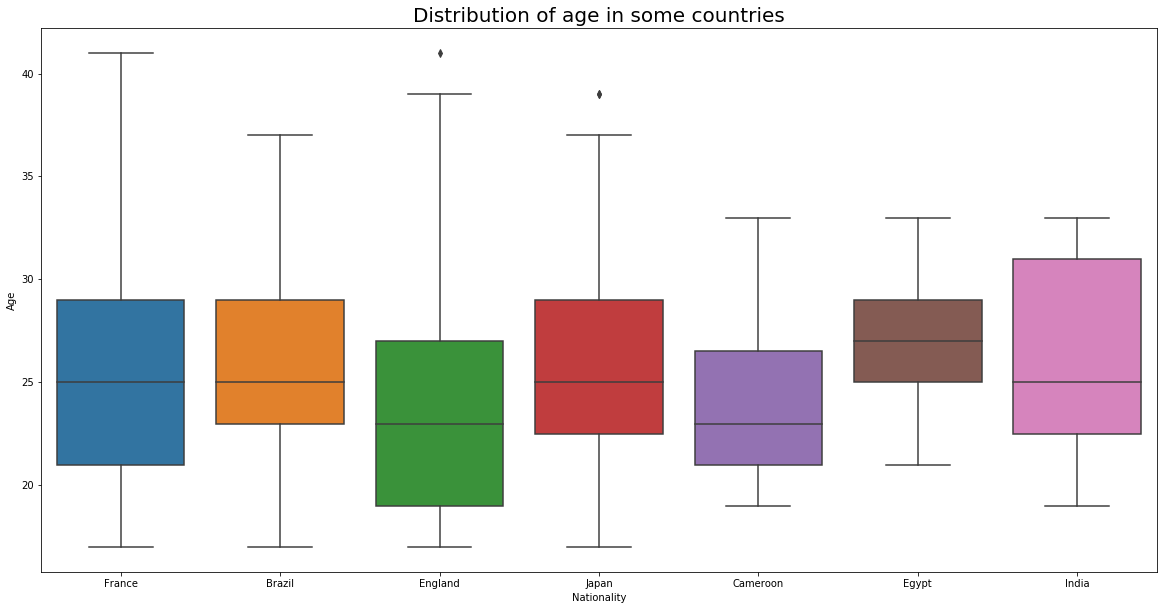

In [17]:
some_count = ('Brazil', 'France', 'England', 'India', 'Egypt', 'Japan','Cameroon')
df_club = data.loc[data['Nationality'].isin(some_count) & data['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxplot(x="Nationality", y="Age", data=df_club);
ax.set_title(label='Distribution of age in some countries', fontsize=20);

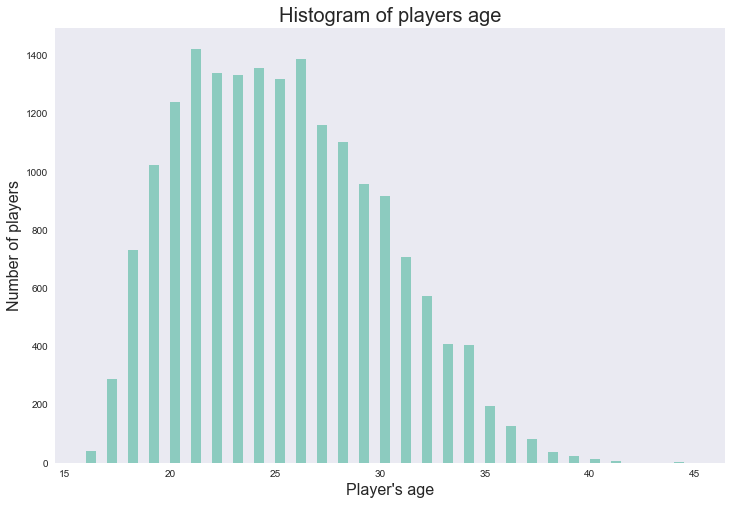

In [18]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = data.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

In [37]:
pos_coun=data.groupby('Position')['ID'].count()
pos_coun=pos_coun.sort_values(ascending = False)
pos_coun=pd.DataFrame(pos_coun)

In [38]:
pos_coun.head(10)

,ID
Position,
ST,2152
GK,2025
CB,1778
CM,1394
LB,1322
RB,1291
RM,1124
LM,1095
CAM,958


Text(0.5,1,u'Bar graph of Player positions')

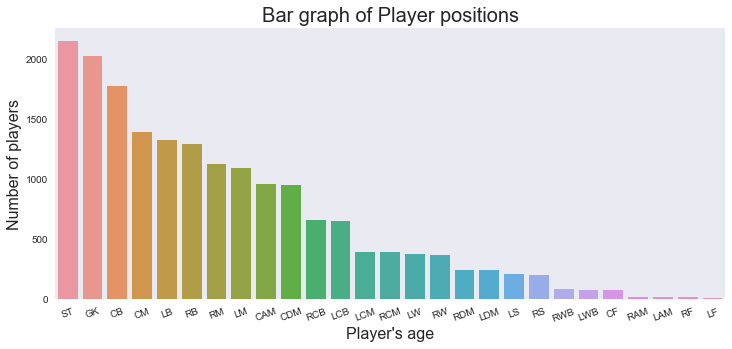

In [40]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = pos_coun.index, y = 'ID', data = pos_coun)
plt.xticks(rotation=20)
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Bar graph of Player positions', fontsize=20)

In [11]:
data.groupby(data['Position'])['Overall'].idxmax()

Position
CAM     17
CB      12
CDM     20
CF     271
CM      67
GK       3
LAM     28
LB      35
LCB     24
LCM     11
LDM     14
LF       5
LM      33
LS      21
LW       2
LWB    474
RAM    129
RB      69
RCB      8
RCM      4
RDM     45
RF       0
RM      25
RS       7
RW      56
RWB    450
ST       1
Name: Overall, dtype: int64

In [42]:
from IPython.display import display, HTML
display(HTML(data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Name', 'Position']].to_html(index=False)))

Name,Position
A. Griezmann,CAM
D. Godín,CB
Sergio Busquets,CDM
Luis Alberto,CF
Thiago,CM
De Gea,GK
J. Rodríguez,LAM
Marcelo,LB
G. Chiellini,LCB
T. Kroos,LCM


In [10]:
data.groupby(data['Position'])['Overall'].idxmax()

Position
CAM    89
CB     90
CDM    89
CF     82
CM     86
GK     91
LAM    88
LB     88
LCB    89
LCM    90
LDM    89
LF     91
LM     88
LS     89
LW     92
LWB    80
RAM    84
RB     86
RCB    91
RCM    91
RDM    87
RF     94
RM     88
RS     91
RW     86
RWB    80
ST     94
Name: Overall, dtype: int64

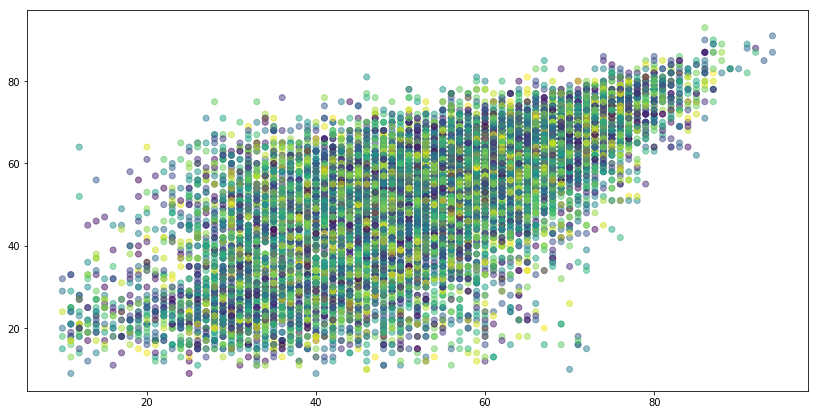

In [18]:
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
N=18207
colors = np.random.rand(N)
ax=plt.scatter(data.Vision, data['LongPassing'],c=colors, alpha=0.5)
#ax.set_title(label='Relation Vision and Long Passing with respected Skills of players', fontsize=20);

In [50]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

# Top three features per position
for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

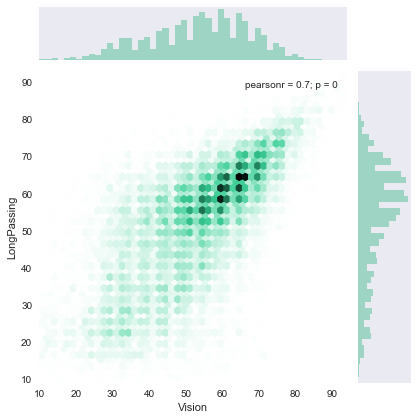

In [55]:
sns.jointplot(x=data['Vision'], y=data['LongPassing'], kind="hex", color="#2CB380");

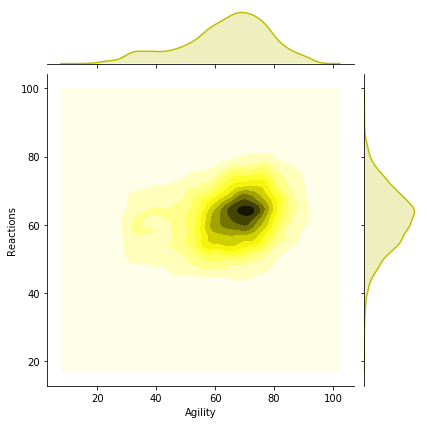

In [27]:
sns.jointplot(x=data['Agility'], y=data['Reactions'], kind="kde", color="y");

In [57]:
club_ov=data.groupby('Club')['Overall'].mean()

In [63]:
club_ov=club_ov.sort_values(ascending=False)
club_ov

Club
Juventus                  82.280000
Napoli                    80.000000
Inter                     79.750000
Real Madrid               78.242424
Milan                     78.074074
FC Barcelona              78.030303
Paris Saint-Germain       77.433333
Roma                      77.423077
Manchester United         77.242424
SL Benfica                77.000000
FC Bayern München         77.000000
Chelsea                   76.787879
Manchester City           76.727273
Tottenham Hotspur         76.696970
FC Porto                  76.678571
Sporting CP               76.133333
Liverpool                 76.000000
Bayer 04 Leverkusen       75.807692
Lazio                     75.437500
Borussia Dortmund         75.333333
Sevilla FC                75.200000
Real Betis                75.185185
Arsenal                   75.181818
Atlético Madrid           75.060606
SC Braga                  74.821429
Valencia CF               74.696970
Villarreal CF             74.343750
FC Schalke 04          

In [13]:
some_clubs = ('LA Galaxy', 'Manchester United')
wage_pl = data.loc[data['Club'].isin(some_clubs) & data['Wage']]
wage_pl=wage_pl

In [16]:
wage=wage_pl.groupby(['Club','Wage','Name'])['Name'].count()
wage

Club               Wage   Name            
LA Galaxy          €10K   G. dos Santos       1
                          J. dos Santos       1
                          O. Kamara           1
                   €11K   R. Alessandrini     1
                   €15K   Z. Ibrahimović      1
                   €1K    A. Lassiter         1
                          B. Sylvestre        1
                          H. Arellano         1
                          J. Vom Steeg        1
                   €2K    B. Hušidić          1
                          B. Jamieson IV      1
                          D. Bingham          1
                          J. Skjelvik         1
                          T. Hilliard-Arce    1
                   €3K    C. Pontius          1
                          D. Steres           1
                          E. Boateng          1
                          R. Feltscher        1
                          S. Carrasco         1
                          S. Williams        

In [85]:
weak=data.groupby('Weak Foot')['ID'].count()
weak=pd.DataFrame(weak)
weak

,ID
Weak Foot,
1.0,158
2.0,3761
3.0,11349
4.0,2662
5.0,229


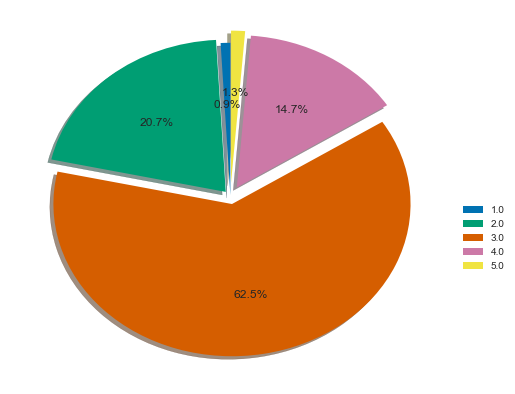

In [91]:
fig, ax = plt.subplots(figsize=(8,7))
explode = (0.01,0.04,0.05,0.07,0.09)
ax.pie(weak, labels = None, autopct='%1.1f%%', startangle=90, shadow = True, explode = explode)
ax.legend(bbox_to_anchor=(1,0.5), labels=weak.index)

In [25]:
loan_from=data.groupby('Loaned From')['ID'].count()
loan_from=loan_from.sort_values(ascending=False)
loan_from=pd.DataFrame(loan_from)
loan_from=loan_from.head(10)

In [30]:
loan_from.index.names=['Team']
loan_from


,ID
Team,
Atalanta,20
Sassuolo,18
Juventus,17
SL Benfica,17
Sporting CP,14
Liverpool,12
Manchester City,12
Leeds United,12
Udinese,12


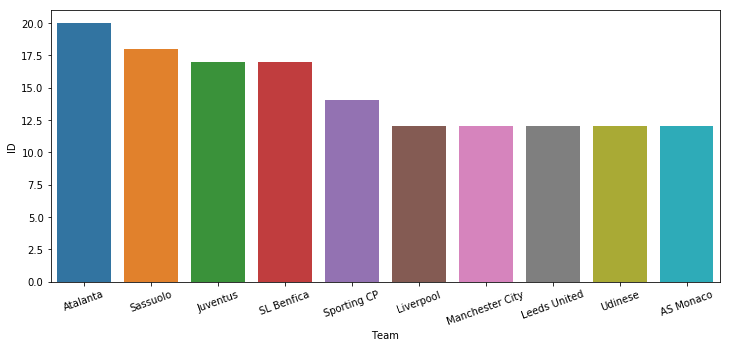

In [32]:
fig, ax = plt.subplots(figsize=(12,5))

plt.xticks(rotation=20)
sns.barplot(x=loan_from.index, y="ID", data=loan_from)

0        5.0
1        5.0
2        5.0
3        4.0
4        4.0
5        4.0
6        4.0
7        5.0
8        4.0
9        3.0
10       4.0
11       4.0
12       3.0
13       4.0
14       3.0
15       3.0
16       3.0
17       4.0
18       3.0
19       4.0
20       4.0
21       4.0
22       5.0
23       4.0
24       4.0
25       3.0
26       3.0
27       3.0
28       4.0
29       3.0
        ... 
18177    1.0
18178    1.0
18179    1.0
18180    1.0
18181    1.0
18182    1.0
18183    1.0
18184    1.0
18185    1.0
18186    1.0
18187    1.0
18188    1.0
18189    1.0
18190    1.0
18191    1.0
18192    1.0
18193    1.0
18194    1.0
18195    1.0
18196    1.0
18197    1.0
18198    1.0
18199    1.0
18200    1.0
18201    1.0
18202    1.0
18203    1.0
18204    1.0
18205    1.0
18206    1.0
Name: International Reputation, Length: 18207, dtype: float64

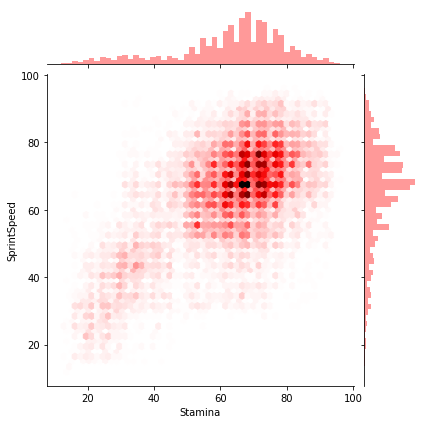

In [45]:
sns.jointplot(x=data['Stamina'], y=data['SprintSpeed'], kind="hex", color="r");

In [58]:
intce=data[['Name','Interceptions']].sort_values('Interceptions',ascending=False)
intce.head()

,Name,Interceptions
14,N. Kanté,92.0
34,M. Hummels,92.0
70,L. Bonucci,90.0
8,Sergio Ramos,90.0
152,A. Barzagli,90.0


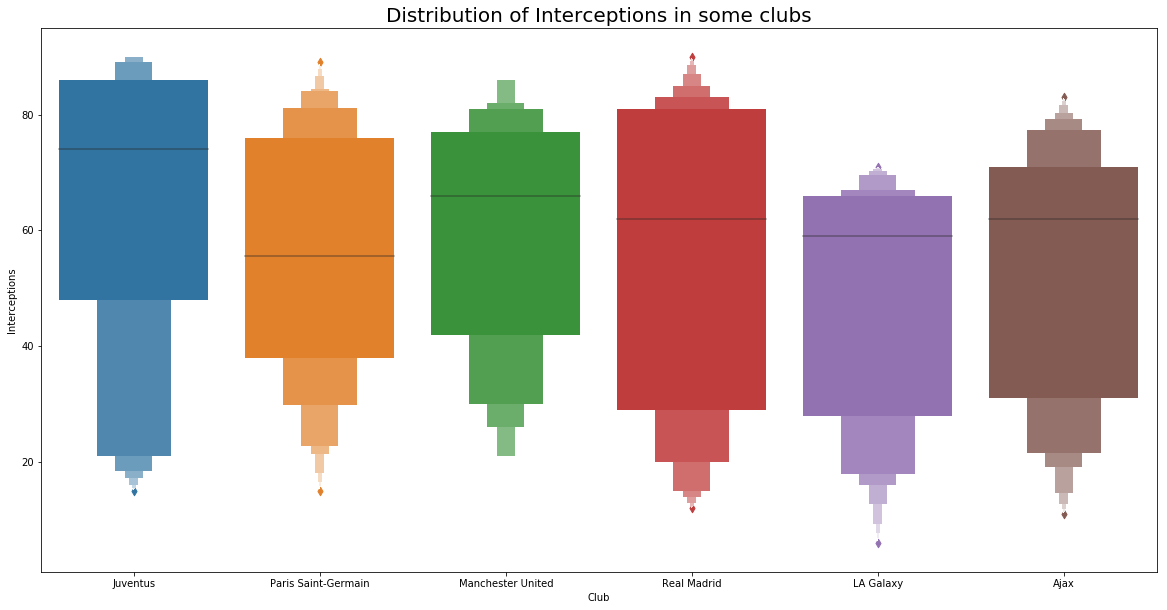

In [59]:
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'Ajax', 'LA Galaxy', 'Manchester United')
df_club = data.loc[data['Club'].isin(some_clubs) & data['Interceptions']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxenplot(x="Club", y="Interceptions", data=df_club);
ax.set_title(label='Distribution of Interceptions in some clubs', fontsize=20);